## Incoherent Type 4 FFL with AND gate

Implement the incoherent type 4 FFL with an AND gate, as described by Mangan & Alon (PNAS, 2003).

The parameters are
- B_y: basal rate of Y's transcription
- Beta_y: maximum rate of Y's transcription
- B_z: basal rate of Z's transcription
- Beta_z: maximum rate of Z's transcription
- K_xy: the activation threshold for X's activation of Y
- K_xz: the activation threshold for X's activation of Z
- K_yz: the activation threshold for Y's activation of Z
- H: the Hill coefficient (exponent) for all regulation
- alpha_y: the degradation rate constant for Y
- alpha_z: the degradation rate constant for Z
- SX: amount of active X in system (X*=SX)
- SY: whether or not Y is activated (Y*=Y if SY=1, Y*=0 if SY=0)

The model is
\begin{eqnarray*}
\frac{dY}{dt} &=& B_y + \beta_Y \frac{1}{1+(X^*/K_{xy})^H} - \alpha_y Y\\
\frac{dZ}{dt} &=& B_z + \beta_Z \left(\frac{(X^*/K_{xz})^H}{1+(X^*/K_{xz})^H}\right) \left(\frac{(Y^*/K_{yz})^H}{1+(Y^*/K_{yz})^H}\right) - \alpha_z Z\\
\end{eqnarray*}


In [1]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

In [2]:
def incoherent_type_4_and_model( t, statevars, params ):
    Y = statevars[0];
    Z = statevars[1];
    B_y = params[0]
    Beta_y = params[1]
    B_z = params[2]
    Beta_z = params[3]
    K_xy = params[4]
    K_xz = params[5]
    K_yz = params[6]
    H = params[7]
    alpha_y = params[8]
    alpha_z = params[9]
    SX = params[10]
    SY = params[11]
    
    if SX == 0:
        Xstar = 0
    else:
        Xstar = 1
    if SY == 0:
        Ystar = 0
    else:
        Ystar = Y
    
    dydt = np.zeros( (2,) )
    yreg = 1/(1 + (Xstar/K_xy)**H)
    zregx = ((Xstar/K_xz)**H)/(1 + (Xstar/K_xz)**H)
    zregy = ((Ystar/K_yz)**H)/(1 + (Ystar/K_yz)**H)
    zreg = zregx * zregy
    dydt[0] = B_y + Beta_y*yreg - alpha_y*Y;
    dydt[1] = B_z + Beta_z*zreg - alpha_z*Z;

    return dydt

### Simulate the model

Simulate the model. In the paper, they specify that for most simulations,

- B_y = 0
- Beta_y = 1
- B_z = 0
- Beta_z = 1
- H = 2
- alpha_y = 1
- alpha_z = 1

The activation thresholds are given in the figure captions, as are SX and SY.

In [5]:
B_y = 0
Beta_y = 1
B_z = 0
Beta_z = 1
K_xy = 0.1
K_xz = 0.1
K_yz = 1 # 1, 0.3, 0.1
H = 2
alpha_y = 1
alpha_z = 1

time_x_on = 0.5
time_x_off = 2.5
params_off = (B_y,Beta_y,B_z,Beta_z,K_xy,K_xz,K_yz,H,alpha_y,alpha_z,0,1);
params_on = (B_y,Beta_y,B_z,Beta_z,K_xy,K_xz,K_yz,H,alpha_y,alpha_z,1,1);

mf_off = lambda t,y : incoherent_type_4_and_model(t,y, params_off)
mf_on = lambda t,y : incoherent_type_4_and_model(t,y, params_on)

sol1 = scipy.integrate.solve_ivp( fun=mf_off, t_span=(0,time_x_on), y0=(0,0), 
                                t_eval=np.arange(0,time_x_on,.01) )
sol2 = scipy.integrate.solve_ivp( fun=mf_on, t_span=(time_x_on,time_x_off), y0=sol1.y[:,-1], 
                                t_eval=np.arange(time_x_on,time_x_off,.01) )
sol3 = scipy.integrate.solve_ivp( fun=mf_off, t_span=(time_x_off,6), y0=sol2.y[:,-1], 
                                t_eval=np.arange(time_x_off,6,.01) )

### Plot the simulation
Plot X over time in an upper subplot and Z over time in a lower subplot.

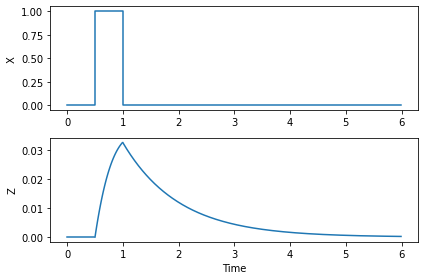

In [6]:
plt.subplot( 2, 1, 1)
plt.plot( [sol1.t[0],time_x_on,time_x_on,time_x_off,time_x_off,sol3.t[-1]], [0,0,1,1,0,0] )
plt.ylabel( "X")
plt.subplot( 2, 1, 2 )
plt.plot(sol1.t, sol1.y[1,:].T); #Simulation before signal on
plt.gca().set_prop_cycle(None) # this resets the color cycle
plt.plot(sol2.t, sol2.y[1,:].T); #Simulation after signal on
plt.gca().set_prop_cycle(None) # this resets the color cycle
plt.plot(sol3.t, sol3.y[1,:].T); #Simulation after signal on
plt.xlabel( 'Time')
plt.ylabel( "Z")
plt.tight_layout()

### Plot the right-hand side of Figure 3 in Mangan & Alon, 2003.

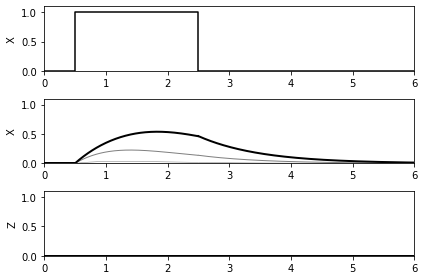

In [22]:
B_y = 0
Beta_y = 1
B_z = 0
Beta_z = 1
K_xy = 0.1
K_xz = 0.1
H = 2
alpha_y = 1
alpha_z = 1

time_x_on = 0.5
time_x_off = 2.5

colors = ['gray', 'gray', 'black']
thickness = [0.5,1,2]
K_yzs = [1, 0.3, .1]
fig, axs = plt.subplots( nrows=3, ncols=1 )

# X on top
axs[0].plot( [sol1.t[0],time_x_on,time_x_on,time_x_off,time_x_off,sol3.t[-1]], 
            [0,0,1,1,0,0], color='k' )
axs[0].set_xlim( [0,6])
axs[0].set_ylabel( "X")
axs[0].set_ylim( [0,1.1])


# Z when SY=1
for i in range(3):
    K_yz = K_yzs[i]
    params_off = (B_y,Beta_y,B_z,Beta_z,K_xy,K_xz,K_yz,H,alpha_y,alpha_z,0,1);
    params_on = (B_y,Beta_y,B_z,Beta_z,K_xy,K_xz,K_yz,H,alpha_y,alpha_z,1,1);

    mf_off = lambda t,y : incoherent_type_4_and_model(t,y, params_off)
    mf_on = lambda t,y : incoherent_type_4_and_model(t,y, params_on)

    sol1 = scipy.integrate.solve_ivp( fun=mf_off, t_span=(0,time_x_on), y0=(0,0), 
                                    t_eval=np.arange(0,time_x_on,.01) )
    sol2 = scipy.integrate.solve_ivp( fun=mf_on, t_span=(time_x_on,time_x_off), y0=sol1.y[:,-1], 
                                    t_eval=np.arange(time_x_on,time_x_off,.01) )
    sol3 = scipy.integrate.solve_ivp( fun=mf_off, t_span=(time_x_off,6), y0=sol2.y[:,-1], 
                                    t_eval=np.arange(time_x_off,6,.01) )

    ax = axs[1]
    ax.plot(sol1.t, sol1.y[1,:].T, color=colors[i], linewidth=thickness[i]); #Simulation before signal on
    ax.plot(sol2.t, sol2.y[1,:].T, color=colors[i], linewidth=thickness[i]); #Simulation after signal on
    ax.plot(sol3.t, sol3.y[1,:].T, color=colors[i], linewidth=thickness[i]); #Simulation after signal on
axs[1].set_ylabel( "Z")
axs[1].set_xlim( [0,6])
axs[1].set_ylim( [0,1.1])


# Z when SY=0
for i in range(3):
    K_yz = K_yzs[i]
    params_off = (B_y,Beta_y,B_z,Beta_z,K_xy,K_xz,K_yz,H,alpha_y,alpha_z,0,0);
    params_on = (B_y,Beta_y,B_z,Beta_z,K_xy,K_xz,K_yz,H,alpha_y,alpha_z,1,0);

    mf_off = lambda t,y : incoherent_type_4_and_model(t,y, params_off)
    mf_on = lambda t,y : incoherent_type_4_and_model(t,y, params_on)

    sol1 = scipy.integrate.solve_ivp( fun=mf_off, t_span=(0,time_x_on), y0=(0,0), 
                                    t_eval=np.arange(0,time_x_on,.01) )
    sol2 = scipy.integrate.solve_ivp( fun=mf_on, t_span=(time_x_on,time_x_off), y0=sol1.y[:,-1], 
                                    t_eval=np.arange(time_x_on,time_x_off,.01) )
    sol3 = scipy.integrate.solve_ivp( fun=mf_off, t_span=(time_x_off,6), y0=sol2.y[:,-1], 
                                    t_eval=np.arange(time_x_off,6,.01) )

    ax = axs[2]
    ax.plot(sol1.t, sol1.y[1,:].T, color=colors[i], linewidth=thickness[i]); #Simulation before signal on
    ax.plot(sol2.t, sol2.y[1,:].T, color=colors[i], linewidth=thickness[i]); #Simulation after signal on
    ax.plot(sol3.t, sol3.y[1,:].T, color=colors[i], linewidth=thickness[i]); #Simulation after signal on
axs[2].set_ylabel( "Z")
axs[2].set_xlim( [0,6])
axs[2].set_ylim( [0,1.1])


plt.tight_layout()
                                 

## Incoherent Type 1 FFL with AND gate

Implement the incoherent type 1 FFL with an AND gate, as described by Mangan & Alon (PNAS, 2003).

The parameters are
- B_y: basal rate of Y's transcription
- Beta_y: maximum rate of Y's transcription
- B_z: basal rate of Z's transcription
- Beta_z: maximum rate of Z's transcription
- K_xy: the activation threshold for X's activation of Y
- K_xz: the activation threshold for X's activation of Z
- K_yz: the activation threshold for Y's activation of Z
- H: the Hill coefficient (exponent) for all regulation
- alpha_y: the degradation rate constant for Y
- alpha_z: the degradation rate constant for Z
- SX: amount of active X in system (X*=SX)
- SY: whether or not Y is activated (Y*=Y if SY=1, Y*=0 if SY=0)

The model is
\begin{eqnarray*}
\frac{dY}{dt} &=& B_y + \beta_Y \frac{(X^*/K_{xy})^H}{1+(X^*/K_{xy})^H} - \alpha_y Y\\
\frac{dZ}{dt} &=& B_z + \beta_Z \left(\frac{(X^*/K_{xz})^H}{1+(X^*/K_{xz})^H}\right) \left(\frac{1}{1+(Y^*/K_{yz})^H}\right) - \alpha_z Z\\
\end{eqnarray*}

In [18]:
def incoherent_type_1_and_model( t, statevars, params ):
    Y = statevars[0];
    Z = statevars[1];
    B_y = params[0]
    Beta_y = params[1]
    B_z = params[2]
    Beta_z = params[3]
    K_xy = params[4]
    K_xz = params[5]
    K_yz = params[6]
    H = params[7]
    alpha_y = params[8]
    alpha_z = params[9]
    SX = params[10]
    SY = params[11]
    
    if SX == 0:
        Xstar = 0
    else:
        Xstar = 1
    if SY == 0:
        Ystar = 0
    else:
        Ystar = Y
    
    dydt = np.zeros( (2,) )
    yreg = ((Xstar/K_xy)**H)/(1 + (Xstar/K_xy)**H)
    zregx = ((Xstar/K_xz)**H)/(1 + (Xstar/K_xz)**H)
    zregy = (1)/(1 + (Ystar/K_yz)**H)
    zreg = zregx * zregy
    dydt[0] = B_y + Beta_y*yreg - alpha_y*Y;
    dydt[1] = B_z + Beta_z*zreg - alpha_z*Z;

    return dydt

### Simulate the model

Simulate the model. In the paper, they specify that for most simulations,

- B_y = 0
- Beta_y = 1
- B_z = 0
- Beta_z = 1
- H = 2
- alpha_y = 1
- alpha_z = 1

The activation thresholds are given in the figure captions, as are SX and SY.

In [25]:
B_y = 0
Beta_y = 1
B_z = 0
Beta_z = 1
K_xy = 0.1
K_xz = 0.1
K_yz = 0.3 # 0.01, 0.3, 0.1
H = 2
alpha_y = 1
alpha_z = 1

time_x_on = 0.5
time_x_off = 2.5
params_off = (B_y,Beta_y,B_z,Beta_z,K_xy,K_xz,K_yz,H,alpha_y,alpha_z,0,1);
params_on = (B_y,Beta_y,B_z,Beta_z,K_xy,K_xz,K_yz,H,alpha_y,alpha_z,1,1);

mf_off = lambda t,y : incoherent_type_1_and_model(t,y, params_off)
mf_on = lambda t,y : incoherent_type_1_and_model(t,y, params_on)

sol1 = scipy.integrate.solve_ivp( fun=mf_off, t_span=(0,time_x_on), y0=(0,0), 
                                t_eval=np.arange(0,time_x_on,.01) )
sol2 = scipy.integrate.solve_ivp( fun=mf_on, t_span=(time_x_on,time_x_off), y0=sol1.y[:,-1], 
                                t_eval=np.arange(time_x_on,time_x_off,.01) )
sol3 = scipy.integrate.solve_ivp( fun=mf_off, t_span=(time_x_off,6), y0=sol2.y[:,-1], 
                                t_eval=np.arange(time_x_off,6,.01) )

### Plot the simulation
Plot X over time in an upper subplot and Z over time in a lower subplot.

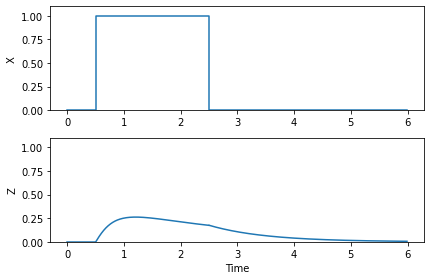

In [26]:
plt.subplot( 2, 1, 1)
plt.plot( [sol1.t[0],time_x_on,time_x_on,time_x_off,time_x_off,sol3.t[-1]], [0,0,1,1,0,0] )
plt.ylabel( "X")
plt.ylim([0,1.1])

plt.subplot( 2, 1, 2 )
plt.plot(sol1.t, sol1.y[1,:].T); #Simulation before signal on
plt.gca().set_prop_cycle(None) # this resets the color cycle
plt.plot(sol2.t, sol2.y[1,:].T); #Simulation after signal on
plt.gca().set_prop_cycle(None) # this resets the color cycle
plt.plot(sol3.t, sol3.y[1,:].T); #Simulation after signal on
plt.xlabel( 'Time')
plt.ylabel( "Z")
plt.ylim([0,1.1])
plt.tight_layout()

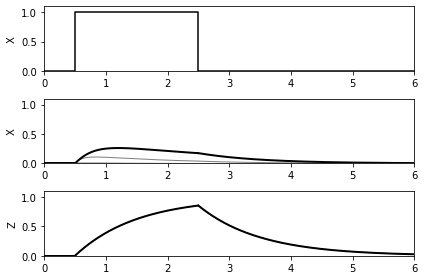

In [27]:
B_y = 0
Beta_y = 1
B_z = 0
Beta_z = 1
K_xy = 0.1
K_xz = 0.1
H = 2
alpha_y = 1
alpha_z = 1

time_x_on = 0.5
time_x_off = 2.5

colors = ['gray', 'gray', 'black']
thickness = [0.5,1,2]
K_yzs = [0.01, 0.1, .3]
fig, axs = plt.subplots( nrows=3, ncols=1 )

# X on top
axs[0].plot( [sol1.t[0],time_x_on,time_x_on,time_x_off,time_x_off,sol3.t[-1]], 
            [0,0,1,1,0,0], color='k' )
axs[0].set_xlim( [0,6])
axs[0].set_ylabel( "X")
axs[0].set_ylim( [0,1.1])


# Z when SY=1
for i in range(3):
    K_yz = K_yzs[i]
    params_off = (B_y,Beta_y,B_z,Beta_z,K_xy,K_xz,K_yz,H,alpha_y,alpha_z,0,1);
    params_on = (B_y,Beta_y,B_z,Beta_z,K_xy,K_xz,K_yz,H,alpha_y,alpha_z,1,1);

    mf_off = lambda t,y : incoherent_type_1_and_model(t,y, params_off)
    mf_on = lambda t,y : incoherent_type_1_and_model(t,y, params_on)

    sol1 = scipy.integrate.solve_ivp( fun=mf_off, t_span=(0,time_x_on), y0=(0,0), 
                                    t_eval=np.arange(0,time_x_on,.01) )
    sol2 = scipy.integrate.solve_ivp( fun=mf_on, t_span=(time_x_on,time_x_off), y0=sol1.y[:,-1], 
                                    t_eval=np.arange(time_x_on,time_x_off,.01) )
    sol3 = scipy.integrate.solve_ivp( fun=mf_off, t_span=(time_x_off,6), y0=sol2.y[:,-1], 
                                    t_eval=np.arange(time_x_off,6,.01) )

    ax = axs[1]
    ax.plot(sol1.t, sol1.y[1,:].T, color=colors[i], linewidth=thickness[i]); #Simulation before signal on
    ax.plot(sol2.t, sol2.y[1,:].T, color=colors[i], linewidth=thickness[i]); #Simulation after signal on
    ax.plot(sol3.t, sol3.y[1,:].T, color=colors[i], linewidth=thickness[i]); #Simulation after signal on
axs[1].set_ylabel( "Z")
axs[1].set_xlim( [0,6])
axs[1].set_ylim( [0,1.1])


# Z when SY=0
for i in range(3):
    K_yz = K_yzs[i]
    params_off = (B_y,Beta_y,B_z,Beta_z,K_xy,K_xz,K_yz,H,alpha_y,alpha_z,0,0);
    params_on = (B_y,Beta_y,B_z,Beta_z,K_xy,K_xz,K_yz,H,alpha_y,alpha_z,1,0);

    mf_off = lambda t,y : incoherent_type_1_and_model(t,y, params_off)
    mf_on = lambda t,y : incoherent_type_1_and_model(t,y, params_on)

    sol1 = scipy.integrate.solve_ivp( fun=mf_off, t_span=(0,time_x_on), y0=(0,0), 
                                    t_eval=np.arange(0,time_x_on,.01) )
    sol2 = scipy.integrate.solve_ivp( fun=mf_on, t_span=(time_x_on,time_x_off), y0=sol1.y[:,-1], 
                                    t_eval=np.arange(time_x_on,time_x_off,.01) )
    sol3 = scipy.integrate.solve_ivp( fun=mf_off, t_span=(time_x_off,6), y0=sol2.y[:,-1], 
                                    t_eval=np.arange(time_x_off,6,.01) )

    ax = axs[2]
    ax.plot(sol1.t, sol1.y[1,:].T, color=colors[i], linewidth=thickness[i]); #Simulation before signal on
    ax.plot(sol2.t, sol2.y[1,:].T, color=colors[i], linewidth=thickness[i]); #Simulation after signal on
    ax.plot(sol3.t, sol3.y[1,:].T, color=colors[i], linewidth=thickness[i]); #Simulation after signal on
axs[2].set_ylabel( "Z")
axs[2].set_xlim( [0,6])
axs[2].set_ylim( [0,1.1])


plt.tight_layout()
                                 

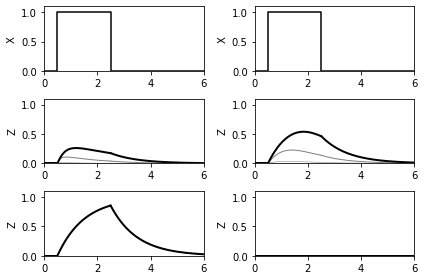

In [34]:
# Put it all together. 
# Figure 3!
B_y = 0
Beta_y = 1
B_z = 0
Beta_z = 1
K_xy = 0.1
K_xz = 0.1
H = 2
alpha_y = 1
alpha_z = 1

time_x_on = 0.5
time_x_off = 2.5

colors = ['gray', 'gray', 'black']
thickness = [0.5,1,2]
fig, axs = plt.subplots( nrows=3, ncols=2 )

# For type 1
K_yzs = [0.01, 0.1, .3]

# X on top
axs[0,0].plot( [sol1.t[0],time_x_on,time_x_on,time_x_off,time_x_off,sol3.t[-1]], 
            [0,0,1,1,0,0], color='k' )
axs[0,0].set_xlim( [0,6])
axs[0,0].set_ylabel( "X")
axs[0,0].set_ylim( [0,1.1])

# Z when SY=1
for i in range(3):
    K_yz = K_yzs[i]
    params_off = (B_y,Beta_y,B_z,Beta_z,K_xy,K_xz,K_yz,H,alpha_y,alpha_z,0,1);
    params_on = (B_y,Beta_y,B_z,Beta_z,K_xy,K_xz,K_yz,H,alpha_y,alpha_z,1,1);

    mf_off = lambda t,y : incoherent_type_1_and_model(t,y, params_off)
    mf_on = lambda t,y : incoherent_type_1_and_model(t,y, params_on)

    sol1 = scipy.integrate.solve_ivp( fun=mf_off, t_span=(0,time_x_on), y0=(0,0), 
                                    t_eval=np.arange(0,time_x_on,.01) )
    sol2 = scipy.integrate.solve_ivp( fun=mf_on, t_span=(time_x_on,time_x_off), y0=sol1.y[:,-1], 
                                    t_eval=np.arange(time_x_on,time_x_off,.01) )
    sol3 = scipy.integrate.solve_ivp( fun=mf_off, t_span=(time_x_off,6), y0=sol2.y[:,-1], 
                                    t_eval=np.arange(time_x_off,6,.01) )

    ax = axs[1,0]
    ax.plot(sol1.t, sol1.y[1,:].T, color=colors[i], linewidth=thickness[i]); #Simulation before signal on
    ax.plot(sol2.t, sol2.y[1,:].T, color=colors[i], linewidth=thickness[i]); #Simulation after signal on
    ax.plot(sol3.t, sol3.y[1,:].T, color=colors[i], linewidth=thickness[i]); #Simulation after signal on
axs[1,0].set_ylabel( "Z")
axs[1,0].set_xlim( [0,6])
axs[1,0].set_ylim( [0,1.1])

# Z when SY=0
for i in range(3):
    K_yz = K_yzs[i]
    params_off = (B_y,Beta_y,B_z,Beta_z,K_xy,K_xz,K_yz,H,alpha_y,alpha_z,0,0);
    params_on = (B_y,Beta_y,B_z,Beta_z,K_xy,K_xz,K_yz,H,alpha_y,alpha_z,1,0);

    mf_off = lambda t,y : incoherent_type_1_and_model(t,y, params_off)
    mf_on = lambda t,y : incoherent_type_1_and_model(t,y, params_on)

    sol1 = scipy.integrate.solve_ivp( fun=mf_off, t_span=(0,time_x_on), y0=(0,0), 
                                    t_eval=np.arange(0,time_x_on,.01) )
    sol2 = scipy.integrate.solve_ivp( fun=mf_on, t_span=(time_x_on,time_x_off), y0=sol1.y[:,-1], 
                                    t_eval=np.arange(time_x_on,time_x_off,.01) )
    sol3 = scipy.integrate.solve_ivp( fun=mf_off, t_span=(time_x_off,6), y0=sol2.y[:,-1], 
                                    t_eval=np.arange(time_x_off,6,.01) )

    ax = axs[2,0]
    ax.plot(sol1.t, sol1.y[1,:].T, color=colors[i], linewidth=thickness[i]); #Simulation before signal on
    ax.plot(sol2.t, sol2.y[1,:].T, color=colors[i], linewidth=thickness[i]); #Simulation after signal on
    ax.plot(sol3.t, sol3.y[1,:].T, color=colors[i], linewidth=thickness[i]); #Simulation after signal on
axs[2,0].set_ylabel( "Z")
axs[2,0].set_xlim( [0,6])
axs[2,0].set_ylim( [0,1.1])

# For type 4
K_yzs = [1, 0.3, .1]

# X on top
axs[0,1].plot( [sol1.t[0],time_x_on,time_x_on,time_x_off,time_x_off,sol3.t[-1]], 
            [0,0,1,1,0,0], color='k' )
axs[0,1].set_xlim( [0,6])
axs[0,1].set_ylabel( "X")
axs[0,1].set_ylim( [0,1.1])


# Z when SY=1
for i in range(3):
    K_yz = K_yzs[i]
    params_off = (B_y,Beta_y,B_z,Beta_z,K_xy,K_xz,K_yz,H,alpha_y,alpha_z,0,1);
    params_on = (B_y,Beta_y,B_z,Beta_z,K_xy,K_xz,K_yz,H,alpha_y,alpha_z,1,1);

    mf_off = lambda t,y : incoherent_type_4_and_model(t,y, params_off)
    mf_on = lambda t,y : incoherent_type_4_and_model(t,y, params_on)

    sol1 = scipy.integrate.solve_ivp( fun=mf_off, t_span=(0,time_x_on), y0=(0,0), 
                                    t_eval=np.arange(0,time_x_on,.01) )
    sol2 = scipy.integrate.solve_ivp( fun=mf_on, t_span=(time_x_on,time_x_off), y0=sol1.y[:,-1], 
                                    t_eval=np.arange(time_x_on,time_x_off,.01) )
    sol3 = scipy.integrate.solve_ivp( fun=mf_off, t_span=(time_x_off,6), y0=sol2.y[:,-1], 
                                    t_eval=np.arange(time_x_off,6,.01) )

    ax = axs[1,1]
    ax.plot(sol1.t, sol1.y[1,:].T, color=colors[i], linewidth=thickness[i]); #Simulation before signal on
    ax.plot(sol2.t, sol2.y[1,:].T, color=colors[i], linewidth=thickness[i]); #Simulation after signal on
    ax.plot(sol3.t, sol3.y[1,:].T, color=colors[i], linewidth=thickness[i]); #Simulation after signal on
axs[1,1].set_ylabel( "Z")
axs[1,1].set_xlim( [0,6])
axs[1,1].set_ylim( [0,1.1])


# Z when SY=0
for i in range(3):
    K_yz = K_yzs[i]
    params_off = (B_y,Beta_y,B_z,Beta_z,K_xy,K_xz,K_yz,H,alpha_y,alpha_z,0,0);
    params_on = (B_y,Beta_y,B_z,Beta_z,K_xy,K_xz,K_yz,H,alpha_y,alpha_z,1,0);

    mf_off = lambda t,y : incoherent_type_4_and_model(t,y, params_off)
    mf_on = lambda t,y : incoherent_type_4_and_model(t,y, params_on)

    sol1 = scipy.integrate.solve_ivp( fun=mf_off, t_span=(0,time_x_on), y0=(0,0), 
                                    t_eval=np.arange(0,time_x_on,.01) )
    sol2 = scipy.integrate.solve_ivp( fun=mf_on, t_span=(time_x_on,time_x_off), y0=sol1.y[:,-1], 
                                    t_eval=np.arange(time_x_on,time_x_off,.01) )
    sol3 = scipy.integrate.solve_ivp( fun=mf_off, t_span=(time_x_off,6), y0=sol2.y[:,-1], 
                                    t_eval=np.arange(time_x_off,6,.01) )

    ax = axs[2,1]
    ax.plot(sol1.t, sol1.y[1,:].T, color=colors[i], linewidth=thickness[i]); #Simulation before signal on
    ax.plot(sol2.t, sol2.y[1,:].T, color=colors[i], linewidth=thickness[i]); #Simulation after signal on
    ax.plot(sol3.t, sol3.y[1,:].T, color=colors[i], linewidth=thickness[i]); #Simulation after signal on
axs[2,1].set_ylabel( "Z")
axs[2,1].set_xlim( [0,6])
axs[2,1].set_ylim( [0,1.1])


plt.tight_layout()
                                 